In [ ]:
# Task 1: Exploratory Data Analysis (EDA)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("mushroom.csv")

# First look
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['class'].value_counts())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

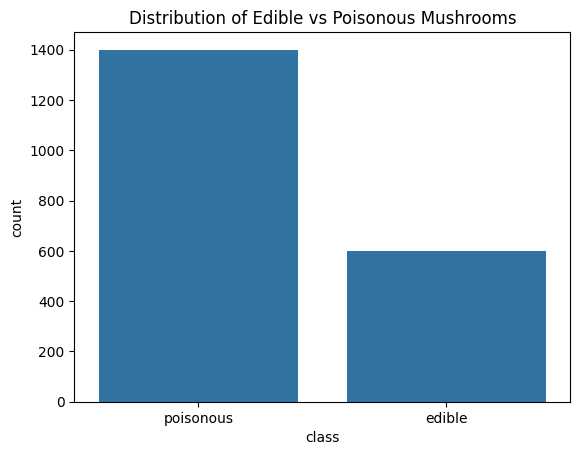

In [ ]:


# Visualize class balance
sns.countplot(x='class', data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()


In [2]:
df.shape

(2000, 26)

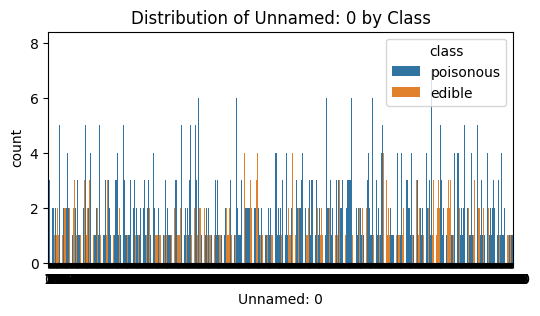

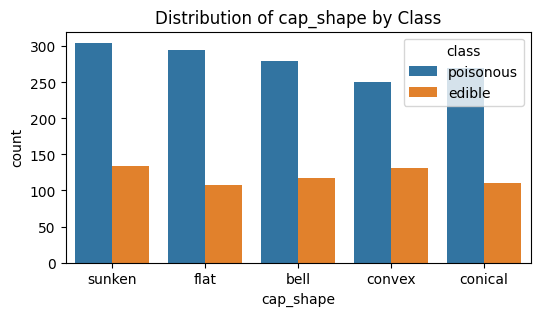

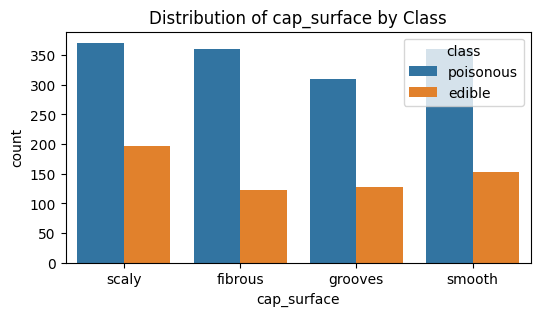

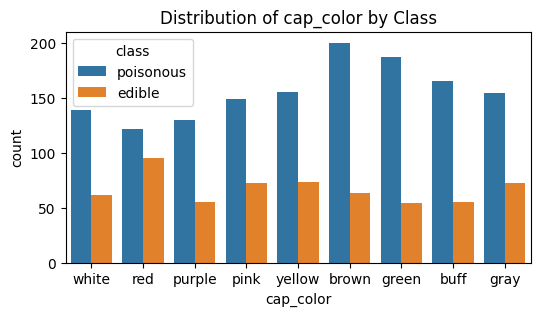

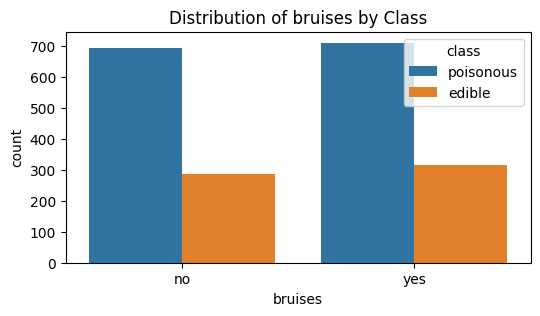

In [ ]:

# Feature Exploration


# Check categorical features distribution
for col in df.columns[:5]:   # show only first 5 features for demo
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, hue="class")
    plt.title(f"Distribution of {col} by Class")
    plt.show()


In [ ]:
# Task 2: Data Preprocessing


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical data
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (1400, 25) Test shape: (600, 25)


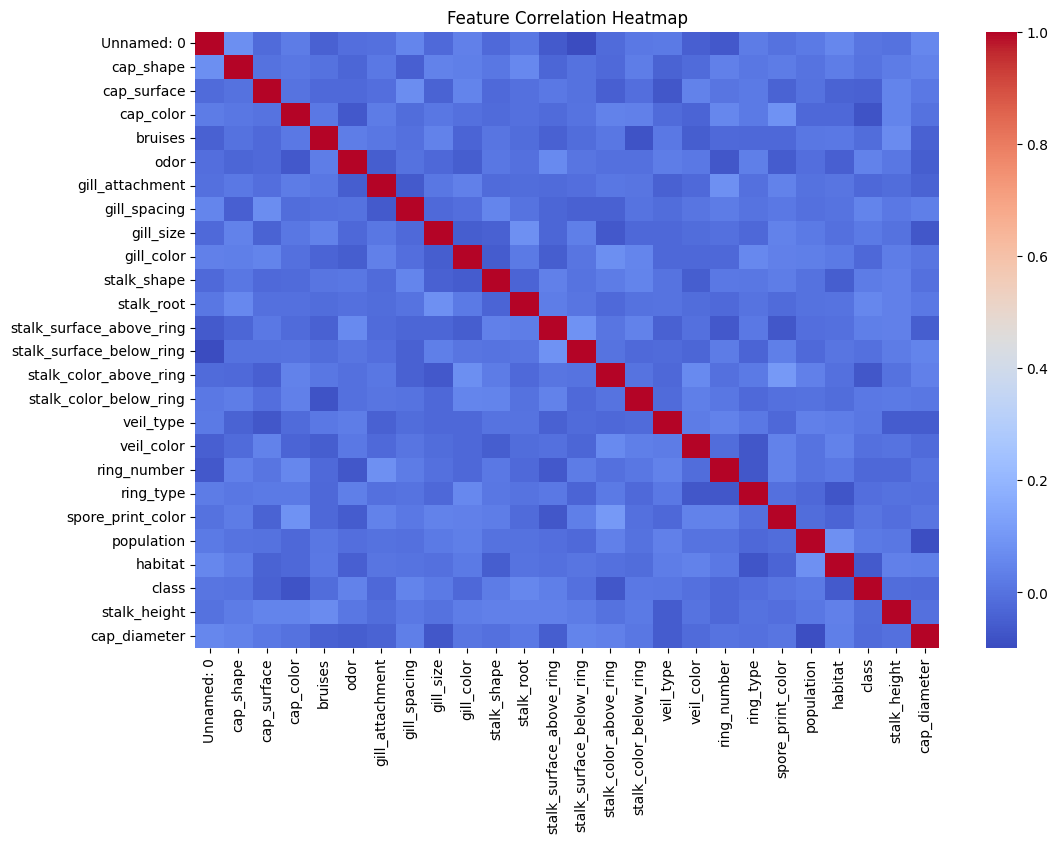

In [ ]:
# Task 3: Data Visualization (Correlations)


plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Task 4: Basic SVM Implementation


from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train linear SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7

Confusion Matrix:
 [[  0 180]
 [  0 420]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.70      1.00      0.82       420

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



C:\Users\mohds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mohds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mohds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

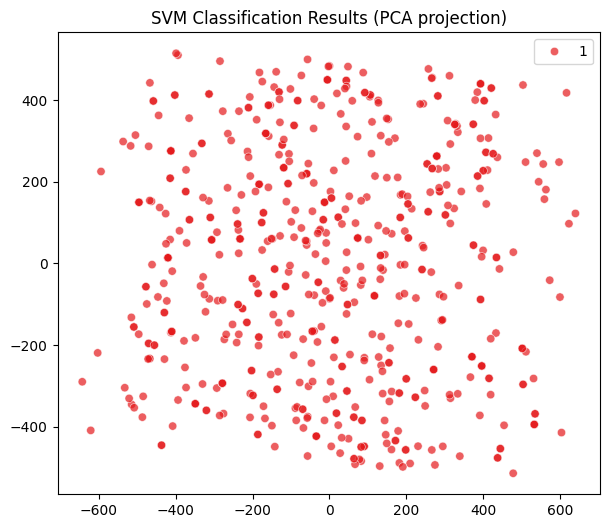

In [ ]:
# Task 5: Visualization of Results (2D with PCA)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y_pred, palette="Set1", alpha=0.7)
plt.title("SVM Classification Results (PCA projection)")
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Chhota parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svm = SVC()
grid_search = GridSearchCV(
    svm, param_grid=param_grid,
    cv=3, n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.8278559459368385


In [ ]:
# Task 7: Kernel Comparison


kernels = ["linear","poly","rbf"]
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred_k))



Kernel: linear
Accuracy: 0.7

Kernel: poly
Accuracy: 0.7

Kernel: rbf
Accuracy: 0.7
